# Aula 13 - Visão Computacional - 07/11/25

# Part 1 - Explicação Teórica e Etapas da Detecção de Imagem

**O que é Visão Computacional ?**

Visão Computacional é um campo da IA que permite que os computadores "vejam" e entendam imagens e videos, imitando o sistema visual humano.
Ela tranforma dados visuais (pixels) em informações úteis para tomada de decisão automática.

---

**Onde é utilizado ?**
- **Segurança**: reconhecimento facial e leitura de placas.
- **Saúde**: diagnóstico por imagem (raios-x, tomografias).
- **Indústria**: inspeção de peças e automação de linha de produção.
- **Agricultura**: análise de plantios com drones.
- **Carros autônomos**: identificação de pedestres, faixas e semáforos.
- **Aplicativos**: Snapchat, filtros do Instagram, leitores de QR code.

---

**Áres de atuação da Visão Computacional**

| Área | Objetivo |
|------|----------|
| Classificação de imagem | Saber o que está na imagem. |
| Detecção de objetos | Saber onde os objetos estão localizados. |
| Segmentação | Delimitar cada objeto em pixels na imagem. |
| Rastreamento | Acompanhar o movimento de objetos em vídeos. |
| OCR e reconhecimento | Ler textos, placas e rostos em imagens. |

---

## Etapas da Detecção de Imagem (explicado com exemplos)

### Passo 1: Aquisição da Imagem

A imagem pode vir:

- De uma **câmera** ao vivo;
- De uma **URL da internet**;
- De um **arquivo local** (JPEG, PNG, etc.).

Exemplo: uma imagem colorida de 640x480 contém 307.200 pixels, cada um com valores RGB.

### Passo 2: Pré-processamento

Objetivo: **preparar a imagem** para facilitar a detecção.

Inclui:

- **Redimensionamento**: torna o processo mais rápido.
- **Conversão para tons de cinza**: reduz de 3 canais (RGB) para 1 canal, facilitando os cálculos.
- **Normalização**: ajusta os valores dos pixels para melhorar a entrada em redes neurais.

Exemplo: uma imagem 640x480 em cores (RGB) tem 921.600 valores (3 por pixel). Convertendo para escala de cinza, reduzimos para 307.200.

### Passo 3: Extração de Características

Objetivo: **identificar padrões úteis**, como bordas, texturas ou formatos.

Técnicas comuns:

- **Haar-like features**: padrões de contraste entre áreas claras e escuras.
- **HOG (Histogram of Oriented Gradients)**: identifica formas com base em direções de bordas.
- **SIFT, SURF**: detectam pontos de interesse robustos.

Exemplo com Haar: identifica que há dois olhos (áreas escuras) acima de uma boca (área clara) — característica típica de um rosto.

### Passo 4: Classificação

Algoritmos determinam **se há um objeto ou não** com base nas características.

- **Haar Cascade** usa classificadores treinados.
- **YOLO** usa redes neurais convolucionais profundas.
- Outros: SVM, Árvores de Decisão, Redes Neurais, etc.

Exemplo: se as características extraídas indicam dois olhos e uma boca, o classificador retorna “Rosto Detectado”.

### Passo 5: Pós-processamento

Refina e mostra os resultados da detecção:

- Desenha-**ding boxes)**.
- Aplica **Non-Maximum Suppression (NMS)** para remover caixas sobrepostas.
- Calcula **confiança (confidence)** de cada detecção.

Exemplo: duas caixas detectaram o mesmo rosto. O algoritmo mantém apenas a que tem maior confiança.

# Parte 2 - Código Haar Cascade 

## Etapa 1: Importações

In [3]:
import cv2                      # OpenCV: biblioteca principal de visão computacional
import matplotlib.pyplot as plt # Exibição de imagens com gráficos
import requests                 # Para baixar imagem da internet
import numpy as np              # Para trabalhar com arrays (imagem em bytes)

## Etapa 2: Carregamento da Imagem

In [ ]:
# URL da imagem
url = "https://media.istockphoto.com/id/1256838328/pt/foto/headshot-portraits-of-diverse-smiling-people.jpg?s=612x612&w=0&k=20&c=ylSSWsavHxJCzZdTU-bRSZoCAKqsdgNFT2PwWh2zC2s="

# Baixa a imagem da internet
response = requests.get(url)

# Converte o conteúdo em array de bytes e decodifica como imagem colorida
img_array = np.asarray(bytearray(response.content), dtype=np.uint8)
img = cv2.imdecode(img_array, cv2.IMREAD_COLOR)

- **`cv2.imdecode`** converte os bytes da imagem para o formato que o OpenCV entende (BGR).

## Etapa 3: Pré-processamento


In [ ]:
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) # type: ignore

- Converte a imagem colorida (RGB/BGR) em tons de cinza.
- Isso facilita e acelera os cálculos para detecção.

## Etapa 4: Carregar o modelo Haar Cascade

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + "haarcascade_frontalface_default.xml") # type: ignore

- Carrega um **modelo pré-treinado** para detectar rostos frontais.
- O arquivo `.xml` contém os padrões que o algoritmo reconhece como “rosto”.

## Etapa 5: Detecção dos Rostos

In [ ]:
faces = face_cascade.detectMultiScale(gray, scaleFactor=1.1, minNeighbors=5)

- **`detectMultiScale`** percorre a imagem procurando padrões de rosto.
- **`scaleFactor=1.1`**: reduz a imagem 10% a cada passo (busca rostos de diferentes tamanhos).
- **`minNeighbors=5`**: exige que um padrão apareça pelo menos 5 vezes próximo para ser considerado um rosto válido.

## Etapa 6: Desenhar as Bounding Boxes

In [ ]:
for (x, y, w, h) in faces:
    cv2.rectangle(img, (x, y), (x + w, y + h), (0, 255, 0), 2) # type: ignore

- Para cada rosto detectado:
    - Desenha um retângulo **verde** em volta da área `(x, y, w, h)`.

## Etapa 7: Exibir o Resultado

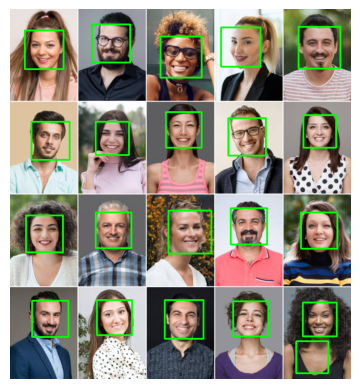

In [20]:
img_rgb = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)  # type: ignore # Matplotlib usa RGB
plt.imshow(img_rgb)
plt.axis("off")
plt.show()


- Converte a imagem BGR para RGB (compatível com o `matplotlib`).
- Exibe a imagem com as caixas ao redor dos rostos.

# Parte 3 – Código YOLOv8

## Etapa 1: Instalação das Bibliotecas (executar no Colab)

#!pip install numpy==1.24.4 --force-reinstall --no-cache-dir  
!pip install --upgrade ultralytics --quiet

- Corrige possíveis **incompatibilidades com o NumPy 2.0+**.
- Instala o pacote `ultralytics`, que contém a biblioteca YOLOv8.

## Etapa 2: Importações

In [22]:
from PIL import Image                    # Trabalhar com imagens no formato PIL
import requests                          # Baixar imagem da internet
from io import BytesIO                   # Manipular dados em bytes
from ultralytics import YOLO             # Importar o modelo YOLOv8
import matplotlib.pyplot as plt          # Para exibir imagens

Creating new Ultralytics Settings v0.0.6 file  
View Ultralytics Settings with 'yolo settings' or at 'C:\Users\playe\AppData\Roaming\Ultralytics\settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


## Etapa 3: Baixar e Abrir a Imagem

In [ ]:
url = "https://encrypted-tbn0.gstatic.com/images?q=tbn:ANd9GcSEnqLgvl4MYwd--diUst4jEKyHYdNHs3MSVQ&s"
response = requests.get(url)
img = Image.open(BytesIO(response.content))

- Baixa a imagem da internet e abre com o **`PIL`** a partir dos dados em bytes.

## Etapa 4: Carregar o Modelo YOLO

In [29]:
model = YOLO("yolov8n.pt")

- Carrega o modelo leve “YOLOv8n” (nano), ideal para tarefas rápidas.
- O modelo já vem **pré-treinado** com detecção de 80 classes (pessoas, carros, animais, etc.).

## Etapa 5: Rodar a Predição

In [ ]:
results = model(img)

- Aplica a detecção na imagem.
- O resultado contém as classes detectadas, coordenadas, confiança e imagem anotada.

## Etapa 6: Exibir Resultado

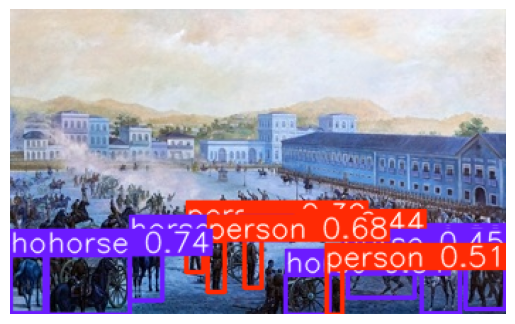

In [31]:
plt.imshow(results[0].plot())  # Mostra imagem com bounding boxes e rótulos
plt.axis("off")
plt.show()

- Exibe a imagem com as caixas e nomes dos objetos detectados.
- `results[0]` contém o primeiro (e único) resultado.